#Before starting

##Sources

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://www.analyticsvidhya.com/blog/2021/06/nlp-sentiment-analysis/

https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html

https://twarc-project.readthedocs.io/en/latest/

https://larevueia.fr/nlp-avec-python-analyse-de-sentiments-sur-twitter/

https://fr.acervolima.com/analyse-des-sentiments-twitter-a-laide-de-python/

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://datascientest.com/data-science-definition

https://datascientest.com/nlp-twitter-analyse-de-sentiment

https://business.twitter.com/fr/blog/what-twitter-kpis-should-you-be-tracking.html

https://www.socialinsider.io/blog/engagement-rate/#:~:text=The%20average%20engagement%20rate%20per%20tweet%20by%20followers%20on%20Twitter,and%20all%20multiplied%20by%20100.

https://www.adobe.com/express/learn/blog/what-is-a-good-social-media-engagement-rate#:~:text=What%20is%20a%20good%20Twitter,with%20anything%20above%201%25%20great.

##Installing Java, Spark, and Findspark

In [ ]:
!wget  https://apache.osuosl.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop2.tgz
!tar xf spark-3.3.2-bin-hadoop2.tgz
!rm spark-3.3.2-bin-hadoop2.tgz
!pip install -q findspark

--2023-06-14 11:50:38--  https://apache.osuosl.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop2.tgz
Resolving apache.osuosl.org (apache.osuosl.org)... 64.50.236.52, 64.50.233.100, 140.211.166.134, ...
Connecting to apache.osuosl.org (apache.osuosl.org)|64.50.236.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274077580 (261M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop2.tgz’

spark-3.3.2-bin-had 100%[===================>] 261.38M  27.2MB/s    in 16s     

2023-06-14 11:50:54 (15.9 MB/s) - ‘spark-3.3.2-bin-hadoop2.tgz’ saved [274077580/274077580]



## Set Environment Variables


In [ ]:
import os
#"/content/spark-3.2.1-bin-hadoop3.2"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop2"

!ln -s /content/spark-3.3.2-bin-hadoop2 /content/spark

!export SPARK_HOME=/content/spark
!export PATH=$PATH:$SPARK_HOME/bin:$SPARK_HOME/sbin

!echo $SPARK_HOME


/content/spark-3.3.2-bin-hadoop2


## Start a SparkSession
This will start a local Spark session.

In [ ]:
!python -V

import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.sql.types import *

sc = SparkContext.getOrCreate()

# Example: shows the PySpark version
print("PySpark version {0}".format(sc.version))

Python 3.10.12
PySpark version 3.3.2


In [ ]:
from pyspark.sql import SparkSession
# We create a SparkSession object (or we retrieve it if it is already created)
spark = SparkSession \
.builder \
.appName("My application") \
.config("spark.some.config.option", "some-value") \
.master("local[4]") \
.getOrCreate()
# We get the SparkContext
sc = spark.sparkContext

##Import libraries

In [ ]:
import numpy as np

# Spark functions

from pyspark.sql.functions import udf,col,when
from pyspark.sql import functions as f
from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.types import *

# pandas

import pandas as pd
pd.options.display.max_colwidth = 400
pd.options.display.max_columns = 90

# matplotlib
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import figure
from matplotlib import pylab
from pylab import *

# plotly

!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

# wordcloud

from wordcloud import WordCloud

# computer vision

from PIL import Image
import cv2

# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import FrenchStemmer

!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

# machine learning

!pip install scikit-plot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# math
import math

# warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /tmp/pip-req-build-3x932f7t
  Running command git clone --filter=blob:none --quiet https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /tmp/pip-req-build-3x932f7t
  Resolved https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to commit bc0ebd0135a6cc78f48ddf184069b4c0b9c017d8
  Preparing metadata (setup.py) ... done


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Installing twarc

In [ ]:
# token : AAAAAAAAAAAAAAAAAAAAAG%2BmoAEAAAAAMHCVvkGehAcZ6SuItHxuWYfFQ0A%3Dm6KN4lXWiB5txYRSwtES0bDDniACwTA1Q5xiF47IGu8v2xz9s3
!pip install --upgrade twarc
!twarc2 configure
!pip install twarc-csv

#key TAyGpeQkbfrqOWjYOsWxkuRrw
#secret oLMMEl5M6cd6lMzoNkTtYBavlK0MjfkH4TupNz6YLKXg2sGHwu

#token 843922517916090371-ZVfKEFTm1wR14nmb6CDz4GALFl3pAk3
#secret S6tewncPUFZuWHizscnnS6fKJl4tkHwoDTr7iLRmy4ZFc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please enter your Bearer Token (leave blank to skip to API key configuration): AAAAAAAAAAAAAAAAAAAAAG%2BmoAEAAAAAMHCVvkGehAcZ6SuItHxuWYfFQ0A%3Dm6KN4lXWiB5txYRSwtES0bDDniACwTA1Q5xiF47IGu8v2xz9s3
(Optional) Add API keys and secrets for user mode authentication [y or n]? n

Your keys have been written to /root/.config/twarc/config


✨ ✨ ✨  Happy twarcing! ✨ ✨ ✨

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# I : Twitter Activity Analysis


In [ ]:
!twarc2 counts "airfrance" --csv --granularity hour >airfrance_counts.csv
!twarc2 counts "lufthansa" --csv --granularity hour >lufthansa_counts.csv
!twarc2 counts "britishairways" --csv --granularity hour >britishairways_counts.csv

In [ ]:
countSchema = StructType([ \
    StructField("start",TimestampType (),False), \
    StructField("end",TimestampType (),False), \
    StructField("hour_count",IntegerType (),False), \
  ])

In [ ]:
dfAirfrance = (spark.read\
    .schema(countSchema)\
    .option("header", "true")\
    .csv("airfrance_counts.csv"))

dfAirfrance = dfAirfrance\
    .withColumnRenamed("start", "start_airfrance")\
    .withColumnRenamed("end", "end_airfrance")\
    .withColumnRenamed("hour_count", "hour_count_airfrance")

dfAirfrance.show(5)

print(dfAirfrance.count())

+-------------------+-------------------+--------------------+
|    start_airfrance|      end_airfrance|hour_count_airfrance|
+-------------------+-------------------+--------------------+
|2023-06-03 09:55:23|2023-06-03 10:00:00|                   1|
|2023-06-03 10:00:00|2023-06-03 11:00:00|                  34|
|2023-06-03 11:00:00|2023-06-03 12:00:00|                  33|
|2023-06-03 12:00:00|2023-06-03 13:00:00|                  49|
|2023-06-03 13:00:00|2023-06-03 14:00:00|                  50|
+-------------------+-------------------+--------------------+
only showing top 5 rows

169


In [ ]:
dfBritishairways = (spark\
    .read\
    .schema(countSchema)\
    .option("header", "true")\
    .csv("britishairways_counts.csv"))

dfBritishairways = dfBritishairways\
    .withColumnRenamed("start", "start_britishairways")\
    .withColumnRenamed("end", "end_britishairways")\
    .withColumnRenamed("hour_count", "hour_count_britishairways")

dfBritishairways.show(5)
print(dfBritishairways.count())

+--------------------+-------------------+-------------------------+
|start_britishairways| end_britishairways|hour_count_britishairways|
+--------------------+-------------------+-------------------------+
| 2023-06-03 09:55:27|2023-06-03 10:00:00|                       10|
| 2023-06-03 10:00:00|2023-06-03 11:00:00|                       44|
| 2023-06-03 11:00:00|2023-06-03 12:00:00|                       57|
| 2023-06-03 12:00:00|2023-06-03 13:00:00|                       42|
| 2023-06-03 13:00:00|2023-06-03 14:00:00|                       50|
+--------------------+-------------------+-------------------------+
only showing top 5 rows

169


In [ ]:
dfLufthansa = (spark\
    .read\
    .schema(countSchema)\
    .option("header", "true")\
    .csv("lufthansa_counts.csv"))

dfLufthansa = dfLufthansa\
    .withColumnRenamed("start", "start_lufthansa")\
    .withColumnRenamed("end", "end_lufthansa")\
    .withColumnRenamed("hour_count", "hour_count_lufthansa")

dfLufthansa.show(5)
print(dfLufthansa.count())

+-------------------+-------------------+--------------------+
|    start_lufthansa|      end_lufthansa|hour_count_lufthansa|
+-------------------+-------------------+--------------------+
|2023-06-03 09:55:25|2023-06-03 10:00:00|                   2|
|2023-06-03 10:00:00|2023-06-03 11:00:00|                  39|
|2023-06-03 11:00:00|2023-06-03 12:00:00|                  27|
|2023-06-03 12:00:00|2023-06-03 13:00:00|                  46|
|2023-06-03 13:00:00|2023-06-03 14:00:00|                  52|
+-------------------+-------------------+--------------------+
only showing top 5 rows

169


In [ ]:
joinExpression = dfAirfrance["start_airfrance"] == dfBritishairways["start_britishairways"]
joinType = "inner"
dfInner = dfAirfrance.join(dfBritishairways, joinExpression, joinType)
nRows = dfInner.count()

joinExpression2 = dfInner["start_airfrance"] == dfLufthansa["start_lufthansa"]
joinType = "inner"
dfInner2 = dfInner.join(dfLufthansa, joinExpression2, joinType)
nRows2 = dfInner2.count()


dfFinal = dfInner2\
  .select("start_airfrance","hour_count_airfrance","hour_count_britishairways","hour_count_lufthansa")\
  .withColumnRenamed("start_airfrance", "start")

dfFinal.show(5)
print(dfFinal.count())

+-------------------+--------------------+-------------------------+--------------------+
|              start|hour_count_airfrance|hour_count_britishairways|hour_count_lufthansa|
+-------------------+--------------------+-------------------------+--------------------+
|2023-06-03 10:00:00|                  34|                       44|                  39|
|2023-06-03 11:00:00|                  33|                       57|                  27|
|2023-06-03 12:00:00|                  49|                       42|                  46|
|2023-06-03 13:00:00|                  50|                       50|                  52|
|2023-06-03 14:00:00|                  47|                       62|                  45|
+-------------------+--------------------+-------------------------+--------------------+
only showing top 5 rows

168


In [ ]:
# Make a line plot from the DataFrame and specify x and y axes, axes titles, and plot title

figure = px.line(dfFinal.toPandas(), x='start', y=['hour_count_airfrance','hour_count_britishairways','hour_count_lufthansa'],
    title = "Number of Tweets per hour").update_layout(legend_title="Mention",
    xaxis_title="Date", yaxis_title="Number of Tweets")

figure.data[0].line.color = 'rgb(255,0,0)'
figure.data[1].line.color = 'rgb(135,206,250)'
figure.data[2].line.color = 'rgb(50,205,50)'

new_labels = {'hour_count_airfrance':'Air France', 'hour_count_britishairways': 'British Airways', 'hour_count_lufthansa': 'Lufthansa'}

figure.for_each_trace(lambda t: t.update(name = new_labels[t.name],
                                      legendgroup = new_labels[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, new_labels[t.name])
                                     )
                  )

figure.show()


In [ ]:
!twarc2 counts "france" --csv --granularity hour > timeseries.csv

In [ ]:
dfTS = spark.read\
    .schema(countSchema)\
    .option("header", "true")\
    .csv("timeseries.csv")

In [ ]:
dfTS.show(5)

+-------------------+-------------------+----------+
|              start|                end|hour_count|
+-------------------+-------------------+----------+
|2023-06-06 16:43:22|2023-06-06 17:00:00|      4919|
|2023-06-06 17:00:00|2023-06-06 18:00:00|     17753|
|2023-06-06 18:00:00|2023-06-06 19:00:00|     18667|
|2023-06-06 19:00:00|2023-06-06 20:00:00|     16904|
|2023-06-06 20:00:00|2023-06-06 21:00:00|     15705|
+-------------------+-------------------+----------+
only showing top 5 rows



In [ ]:
figure2 = px.line(dfTS.toPandas(),x='start', y='hour_count',
    labels={'start': 'Date',
            'hour_count' : 'Number of Tweets'},
    title = "Number of Tweets with the mention 'France' per hour")

figure2.show()

In [ ]:
import pyspark.sql.functions as f


step = 2 #the rolling average step is equal to 2*step

w = (Window().rowsBetween(1 - step, step - 1))
w2 = (Window().rowsBetween(- step, - step))
w3 = (Window().rowsBetween(step, step))

dfAVG = dfTS\
  .where(f.col("start")!= dfTS.select(f.col("start")).collect()[0][0])\
  .withColumn('rolling_average', (f.sum("hour_count").over(w)+0.5*f.sum("hour_count").over(w2)+0.5*f.sum("hour_count").over(w3))/(2*step))\
  .select("start","hour_count","rolling_average")\


dfAVG.show(5)

+-------------------+----------+---------------+
|              start|hour_count|rolling_average|
+-------------------+----------+---------------+
|2023-06-06 17:00:00|     17753|           null|
|2023-06-06 18:00:00|     18667|           null|
|2023-06-06 19:00:00|     16904|       16794.75|
|2023-06-06 20:00:00|     15705|      15156.375|
|2023-06-06 21:00:00|     14053|      12679.625|
+-------------------+----------+---------------+
only showing top 5 rows



In [ ]:
average = float(dfTS.agg(avg(col("hour_count"))).collect()[0][0])

dfAVG2 = dfAVG\
  .na.fill(value=average,subset=["rolling_average"])\
  .select("start","hour_count",f.round("rolling_average").alias("rolling_average"))

dfAVG2.show(5)

+-------------------+----------+---------------+
|              start|hour_count|rolling_average|
+-------------------+----------+---------------+
|2023-06-06 17:00:00|     17753|        12165.0|
|2023-06-06 18:00:00|     18667|        12165.0|
|2023-06-06 19:00:00|     16904|        16795.0|
|2023-06-06 20:00:00|     15705|        15156.0|
|2023-06-06 21:00:00|     14053|        12680.0|
+-------------------+----------+---------------+
only showing top 5 rows



In [ ]:
dfTREND = dfAVG2\
  .withColumn("trend", f.col("hour_count")-f.col("rolling_average" ))\

dfTREND.show(5)

+-------------------+----------+---------------+------+
|              start|hour_count|rolling_average| trend|
+-------------------+----------+---------------+------+
|2023-06-06 17:00:00|     17753|        12165.0|5588.0|
|2023-06-06 18:00:00|     18667|        12165.0|6502.0|
|2023-06-06 19:00:00|     16904|        16795.0| 109.0|
|2023-06-06 20:00:00|     15705|        15156.0| 549.0|
|2023-06-06 21:00:00|     14053|        12680.0|1373.0|
+-------------------+----------+---------------+------+
only showing top 5 rows



In [ ]:
dfOccurrences = dfTREND\
  .select("hour_count","rolling_average" ,f.regexp_replace(f.col("start"), "[0-9]{4}\-[0-9]{2}\-[0-9]{2} ", "").alias("start_replace"))\
  .groupBy("start_replace").count()\
  .orderBy("start_replace")

dfOccurrences.show(dfOccurrences.count())

occurrences = dfOccurrences.select("count").collect()[0][0]


+-------------+-----+
|start_replace|count|
+-------------+-----+
|     00:00:00|    7|
|     01:00:00|    7|
|     02:00:00|    7|
|     03:00:00|    7|
|     04:00:00|    7|
|     05:00:00|    7|
|     06:00:00|    7|
|     07:00:00|    7|
|     08:00:00|    7|
|     09:00:00|    7|
|     10:00:00|    7|
|     11:00:00|    7|
|     12:00:00|    7|
|     13:00:00|    7|
|     14:00:00|    7|
|     15:00:00|    7|
|     16:00:00|    7|
|     17:00:00|    7|
|     18:00:00|    7|
|     19:00:00|    7|
|     20:00:00|    7|
|     21:00:00|    7|
|     22:00:00|    7|
|     23:00:00|    7|
+-------------+-----+



In [ ]:
dfCOEFF = dfTREND\
  .select("hour_count","rolling_average" ,f.regexp_replace(f.col("start"), "[0-9]{4}\-[0-9]{2}\-[0-9]{2} ", "").alias("start_replace"))\
  .groupBy("start_replace").sum("rolling_average")\
  .select("start_replace",(f.col("sum(rolling_average)")/occurrences).alias("coeff"))\
  .orderBy("start_replace")

dfCOEFF.show(dfCOEFF.count())

+-------------+------------------+
|start_replace|             coeff|
+-------------+------------------+
|     00:00:00| 5105.285714285715|
|     01:00:00| 4202.857142857143|
|     02:00:00| 4132.571428571428|
|     03:00:00| 5054.428571428572|
|     04:00:00|            6869.0|
|     05:00:00|  9031.57142857143|
|     06:00:00|           11062.0|
|     07:00:00|12584.142857142857|
|     08:00:00|13537.857142857143|
|     09:00:00|14344.285714285714|
|     10:00:00| 15142.42857142857|
|     11:00:00|15745.857142857143|
|     12:00:00|16247.714285714286|
|     13:00:00|16720.714285714286|
|     14:00:00|17017.714285714286|
|     15:00:00|           16582.0|
|     16:00:00| 16576.14285714286|
|     17:00:00|16297.714285714286|
|     18:00:00|           15812.0|
|     19:00:00|15796.285714285714|
|     20:00:00|           14245.0|
|     21:00:00|           11960.0|
|     22:00:00| 9384.285714285714|
|     23:00:00| 6906.428571428572|
+-------------+------------------+



In [ ]:
coeff_avg = dfCOEFF.groupBy().sum().collect()[0][0] / dfCOEFF.count()
print(coeff_avg)

12098.261904761908


In [ ]:
dfCOEFF2 = dfCOEFF.withColumn("coeff_norm",f.col("coeff")-coeff_avg)
dfCOEFF2.show(dfCOEFF2.count())

+-------------+------------------+-------------------+
|start_replace|             coeff|         coeff_norm|
+-------------+------------------+-------------------+
|     00:00:00| 5105.285714285715| -6992.976190476194|
|     01:00:00| 4202.857142857143| -7895.404761904765|
|     02:00:00| 4132.571428571428|  -7965.69047619048|
|     03:00:00| 5054.428571428572| -7043.833333333337|
|     04:00:00|            6869.0| -5229.261904761908|
|     05:00:00|  9031.57142857143| -3066.690476190479|
|     06:00:00|           11062.0|-1036.2619047619082|
|     07:00:00|12584.142857142857| 485.88095238094866|
|     08:00:00|13537.857142857143|  1439.595238095235|
|     09:00:00|14344.285714285714| 2246.0238095238055|
|     10:00:00| 15142.42857142857| 3044.1666666666624|
|     11:00:00|15745.857142857143|  3647.595238095235|
|     12:00:00|16247.714285714286|  4149.452380952378|
|     13:00:00|16720.714285714286|  4622.452380952378|
|     14:00:00|17017.714285714286|  4919.452380952378|
|     15:0

In [ ]:
dfTS2 = dfTS\
  .select("start","hour_count",f.regexp_replace(f.col("start"), "[0-9]{4}\-[0-9]{2}\-[0-9]{2} ", "").alias("start_replace"))\
  .select("start","hour_count",f.regexp_replace(f.col("start_replace"), "\:[0-9]{2}\:[0-9]{2}", ":00:00").alias("start_replace"))

dfTS2.show(5)

+-------------------+----------+-------------+
|              start|hour_count|start_replace|
+-------------------+----------+-------------+
|2023-06-06 16:43:22|      4919|     16:00:00|
|2023-06-06 17:00:00|     17753|     17:00:00|
|2023-06-06 18:00:00|     18667|     18:00:00|
|2023-06-06 19:00:00|     16904|     19:00:00|
|2023-06-06 20:00:00|     15705|     20:00:00|
+-------------------+----------+-------------+
only showing top 5 rows



In [ ]:
avg_count = dfTS2.select(f.mean("hour_count")).collect()[0][0]
limit = 5000

joinExpression = dfTS2["start_replace"] == dfCOEFF2["start_replace"]
joinType = "left"

dfTS3 = dfTS2\
  .join(dfCOEFF2, joinExpression, joinType)\
  .withColumn("hour_count_cvs", f.col("hour_count")-f.col("coeff_norm"))\
  .withColumn("difference", f.col("hour_count")-f.col("hour_count_cvs"))\
  .withColumn("avg",f.lit(avg_count))\
  .withColumn("result",f.col("hour_count_cvs")-f.col("avg"))\
  .withColumn("alert",f.lit(limit))\
  .select("start","hour_count","coeff","coeff_norm","hour_count_cvs","difference","avg","result","alert")

dfTS3.show(5)

+-------------------+----------+------------------+------------------+------------------+------------------+------------------+-------------------+-----+
|              start|hour_count|             coeff|        coeff_norm|    hour_count_cvs|        difference|               avg|             result|alert|
+-------------------+----------+------------------+------------------+------------------+------------------+------------------+-------------------+-----+
|2023-06-06 16:43:22|      4919| 16576.14285714286|4477.8809523809505| 441.1190476190495|4477.8809523809505|12164.852071005917|-11723.733023386867| 5000|
|2023-06-06 17:00:00|     17753|16297.714285714286| 4199.452380952378|13553.547619047622| 4199.452380952378|12164.852071005917| 1388.6955480417055| 5000|
|2023-06-06 18:00:00|     18667|           15812.0| 3713.738095238092|14953.261904761908| 3713.738095238092|12164.852071005917| 2788.4098337559917| 5000|
|2023-06-06 19:00:00|     16904|15796.285714285714|3698.0238095238055|13205.

In [ ]:
figure2 = px.line(dfTS3.toPandas(),x='start', y=['result','alert'],
    title = "Number of Tweets with the mention 'France' per hour without daily variations").update_layout(legend_title="",
    xaxis_title="Date", yaxis_title="Number of Tweets")

new_labels_2 = {'result':'Tweets', 'alert': 'alert threshold'}

figure2.for_each_trace(lambda t: t.update(name = new_labels_2[t.name],
                                      legendgroup = new_labels_2[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, new_labels_2[t.name])
                                     )
                  )

figure2.show()

In [ ]:
dfAlerts = dfTS3\
  .filter(f.col("result")>limit)\
  .select("start","result")

dfAlerts.show(dfAlerts.count())

+-------------------+------------------+
|              start|            result|
+-------------------+------------------+
|2023-06-08 10:00:00| 6607.981262327419|
|2023-06-08 11:00:00|10069.552690898847|
|2023-06-08 12:00:00|13056.695548041705|
|2023-06-08 13:00:00|16025.695548041705|
|2023-06-08 14:00:00|14609.695548041705|
|2023-06-08 15:00:00|14611.409833755992|
|2023-06-08 16:00:00|11094.266976613133|
|2023-06-08 17:00:00|10404.695548041705|
|2023-06-08 18:00:00|12407.409833755992|
|2023-06-08 19:00:00| 9104.124119470278|
|2023-06-08 20:00:00|10654.409833755992|
|2023-06-08 21:00:00| 6998.409833755992|
|2023-06-09 05:00:00| 8167.838405184564|
|2023-06-09 06:00:00| 8363.409833755992|
+-------------------+------------------+



#II : DataFrame preparation

Get a dataframe with the twarc search command

In [ ]:
topic = "Macron"

In [ ]:
!twarc2 search "Macron" extraction.jsonl

In [ ]:
!twarc2 csv --extra-input-columns "public_metrics.bookmark_count" extraction.jsonl extraction.csv

100% 56.2M/56.2M [00:07<00:00, 7.73MB/s]

ℹ️
Parsed 12620 tweets objects from 132 lines in the input file.
Wrote 12620 rows and output 84 columns in the CSV.



In [ ]:
dfTweets = pd.read_csv("macron.csv")
dfTweets = spark.createDataFrame(dfTweets.astype(str))

Here I use Pandas to read the csv file because I had separator issues reading it with Spark

In [ ]:
dfTweets2 = dfTweets.withColumnRenamed("created_at","date")\
        .withColumnRenamed("author.username","userName")\
        .withColumnRenamed("author.name","name")\
        .withColumnRenamed("author.description","userBio")\
        .withColumnRenamed("author.verified","verified")\
        .withColumnRenamed("author.location","location")\
        .withColumnRenamed("public_metrics.retweet_count","retweets")\
        .withColumnRenamed("public_metrics.like_count","likes")\
        .withColumnRenamed("public_metrics.reply_count","replies")

In [ ]:
dfTweets3 =  dfTweets2.select("date","userName","name","userBio","verified","location","text","replies","retweets","likes","lang")


print(dfTweets3.count())

23936


In [ ]:
dfTweets4 = dfTweets3\
  .withColumn("date",col("date").cast(TimestampType()))\
  .withColumn("text",col("text").cast(StringType()))\
  .withColumn("likes",col("likes").cast(IntegerType()))\
  .withColumn("replies",col("replies").cast(IntegerType()))\
  .withColumn("retweets",col("retweets").cast(IntegerType()))

#III : Source Analysis

location analysis

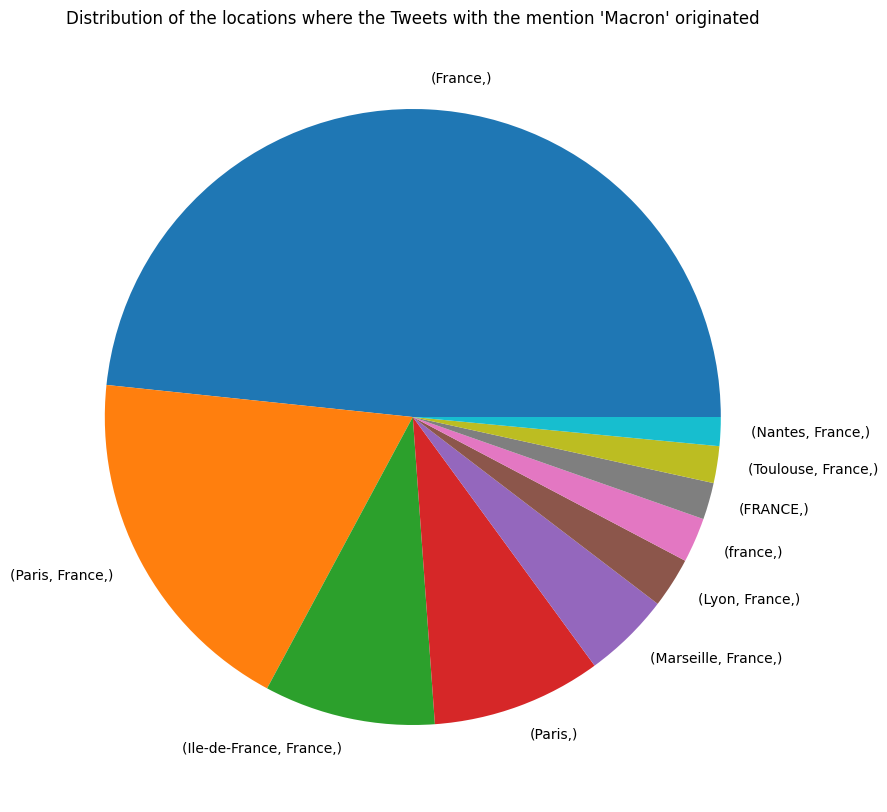

In [ ]:
locationDF=dfTweets4.select("location")\
            .filter(col("location") != "nan")

fig = locationDF.toPandas().value_counts()[:10].plot(kind='pie', figsize=(10, 10), title="Distribution of the locations where the Tweets with the mention '" + topic + "' originated")
plt.show()

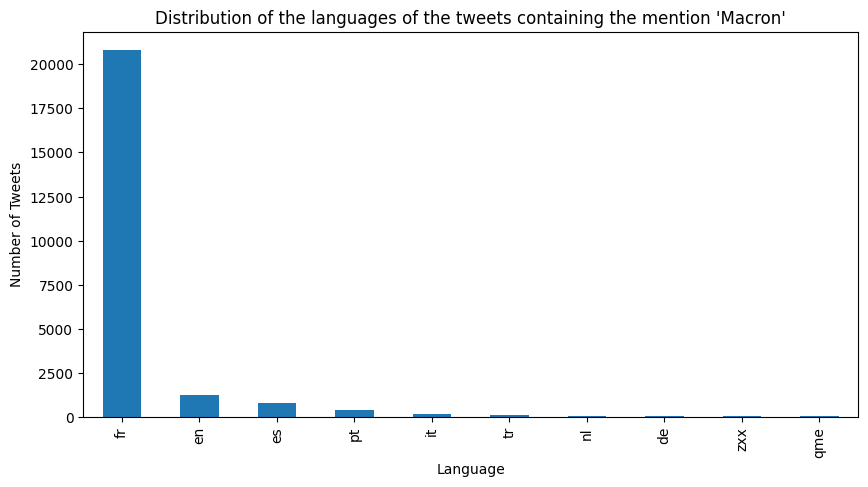

In [ ]:
groupByLang = dfTweets4.groupBy("lang")
dfPostsByLang = groupByLang.count()\
                .filter(col("count") > 1)\
                .orderBy("count", ascending = False)

pandas_df = dfPostsByLang.toPandas()

pandas_df[:10].plot.bar(x='lang', y='count',stacked=False, legend=False, figsize=(10,5),title="Distribution of the languages ​​of the tweets containing the mention '" + topic + "'")
plt.xlabel("Language")
plt.ylabel("Number of Tweets")
plt.show()

In [ ]:
from pyspark.sql import functions as f

max = dfPostsByLang.agg(f.max("count")).collect()[0][0]
language = dfPostsByLang.filter(col("count")==max).select("lang").collect()[0][0]

print(language)

fr


#IV : Natural Language Processing

In [ ]:
import pyspark.sql.functions as f

dfTweets5 = dfTweets4\
          .filter(col("lang") == "en")\
          .select("text","lang",f.regexp_replace(f.col("text"), "https[^\s]+", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "@[^\s]+", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "\\\\n"," ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "-", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), '\[|\]', " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), '"', " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[0-9]", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[" u"é" u"è" u"ë" u"ê" u"è" "]", "e").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"i" u"î" u"ï""]", "i").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"ô" "]", "o").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"à" u"á""]", "a").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[«»!#“”$%&’'() "u" " u"*+,‘./:—€…;·<=>?@\^_`{|}~+]", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                      "]+"," ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "    ", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "   ", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "  ", " ").alias("replace"))\
          .select("text","lang",f.lower(f.col("replace")).alias("replace"))\
          .select("text","replace","lang").dropDuplicates()

In [ ]:
dfTweets5.show(20,truncate = False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+
|text                                                                                                                                                                                                                                                                                                                       |replace                                                                               

In [ ]:
twitterStopwords = ['http','https','co','a','pr','macron','ça','depuis','source','tant','donc','amp','air']

specificStopWords = stopwords.words('english') + twitterStopwords

lm = WordNetLemmatizer()

print(specificStopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def text_transformation(myString):
    corpus = ''
    myString = myString.split()
    myString = [lm.lemmatize(word) for word in myString if word not in set(specificStopWords)]
    corpus+=(' '.join(str(x) for x in myString))
    return corpus

udf_text_transformation = udf(lambda x:text_transformation(x),StringType())

In [ ]:
dfTweets5_lm = dfTweets5\
  .withColumn("text", udf_text_transformation(col("replace")))\
  .select("text")

In [ ]:
dfTweets5_lm.show(100, truncate = False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                                                                                                           |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|suckin macron zelly dick                                                                                                                                                                                                       |
|french smell bad country stinky sissy like macron                                              

In [ ]:
list_tweets = (dfTweets5_lm.select("text").rdd.flatMap(lambda x: x).collect())

In [ ]:
def list_split(list):
    corpus = []
    for item in list:
      new_item = item.split()
      corpus.append(new_item)
    flat_list = [item for sublist in corpus for item in sublist]
    return flat_list

In [ ]:
list_words = list_split(list_tweets)
print(list_words[0])
rdd = spark.sparkContext.parallelize(list_words)
dfWords = rdd.map(lambda x: (x,)).toDF().withColumnRenamed("_1","text")

suckin


In [ ]:
groupByWords = dfWords.groupBy("text").count()

dfWordCount = groupByWords.select("text","count")\
                .orderBy("count", ascending = False)\
                .filter(col("count") >= 5)

dfWordCount.show(10)

+---------+-----+
|     text|count|
+---------+-----+
|   macron|  721|
|   french|  142|
|president|  138|
| emmanuel|   85|
|  ukraine|   80|
|    putin|   79|
|   russia|   76|
|    biden|   72|
|   scholz|   67|
|   attack|   65|
+---------+-----+
only showing top 10 rows



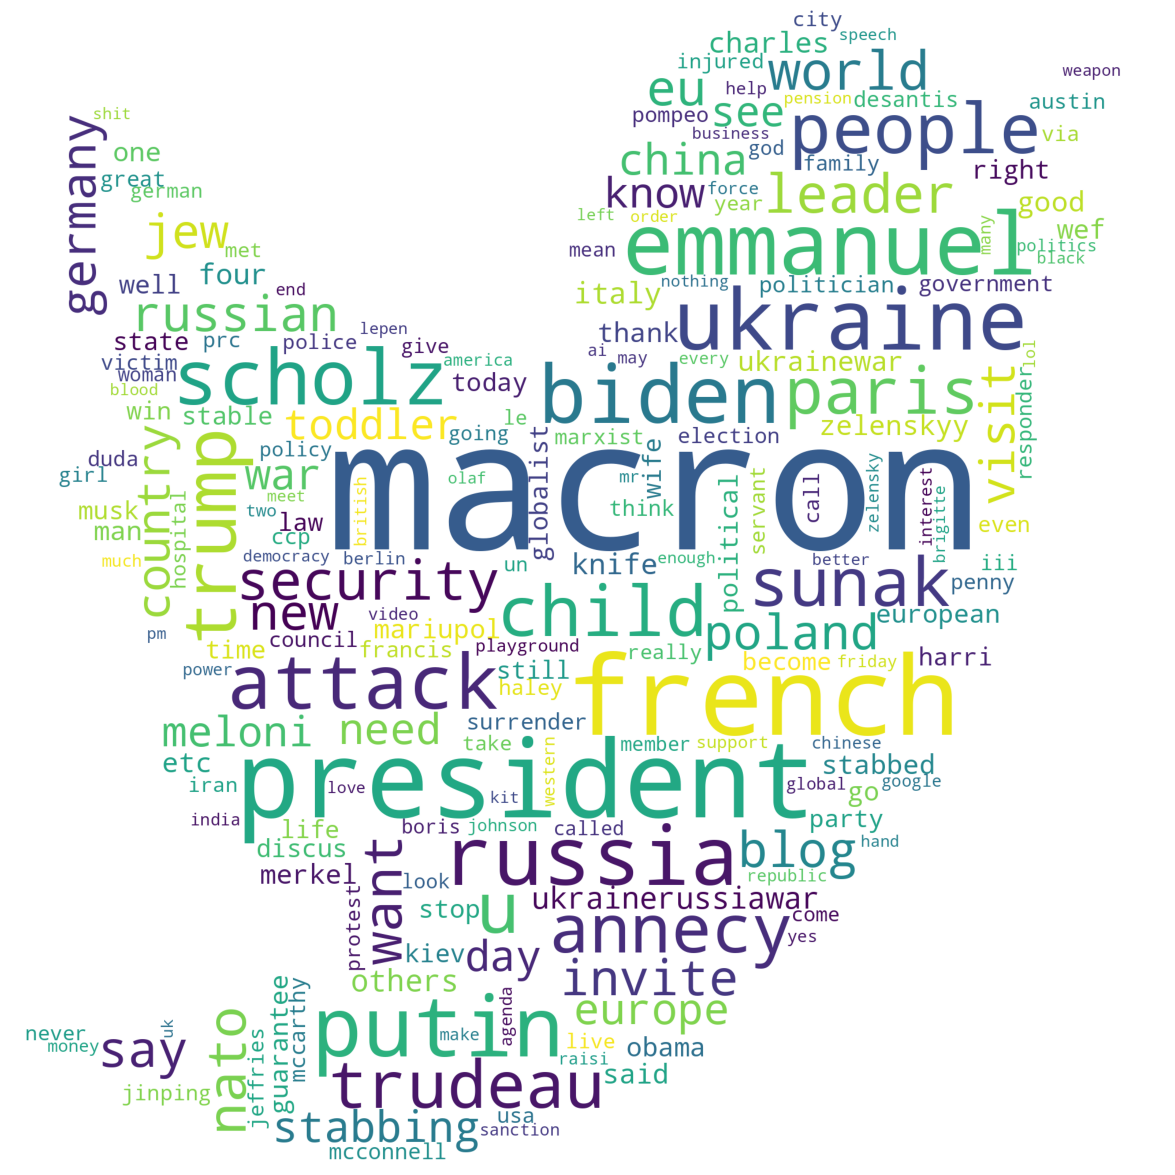

In [ ]:
plt.figure(figsize =(15, 15))

td = Image.open("Twitter_Bird.png")
td = td.resize((2000,2000))
td.save("td2.png")

mask = cv2.imread("img_24635.png",0)
mask2 = cv2.imread("td2.png",0)

ret1,mask2 = cv2.threshold(mask2,127,255,cv2.THRESH_BINARY_INV)
mask2 = cv2.blur(mask2, (25,25))

word_cloud = ""

for i in range(len(list_words)):
  word_cloud = word_cloud + " " + list_words[i]

wordcloud = WordCloud(width = 1000, height = 1000,background_color ='white',collocations=False,min_font_size = 8, mask = mask2).generate(word_cloud)
plt.axis("off")
plt.imshow(wordcloud)
plt.savefig("cloud.png", format="png")
plt.show()

#V : Sentiment Analysis

## Test in english with lemmatization

###Model Training

In [ ]:
sentimentSchema = StructType([ \
    StructField("text",StringType(),True), \
    StructField("label",StringType(),True), \
  ])

In [ ]:
dfTrain = spark.read\
    .schema(sentimentSchema)\
    .option("header", "false")\
    .option("delimiter", ";")\
    .csv("train.txt")

dfVal = spark.read\
    .schema(sentimentSchema)\
    .option("header", "false")\
    .option("delimiter", ";")\
    .csv("val.txt")

In [ ]:
dfResult = dfTrain.union(dfVal)

In [ ]:
dfResult.show(10,truncate = False)

+--------------------------------------------------------------------------------------------------------------------------+--------+
|text                                                                                                                      |label   |
+--------------------------------------------------------------------------------------------------------------------------+--------+
|i didnt feel humiliated                                                                                                   |sadness |
|i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake              |sadness |
|im grabbing a minute to post i feel greedy wrong                                                                          |anger   |
|i am ever feeling nostalgic about the fireplace i will know that it is still on the property                              |love    |
|i am feeling grouchy                                         

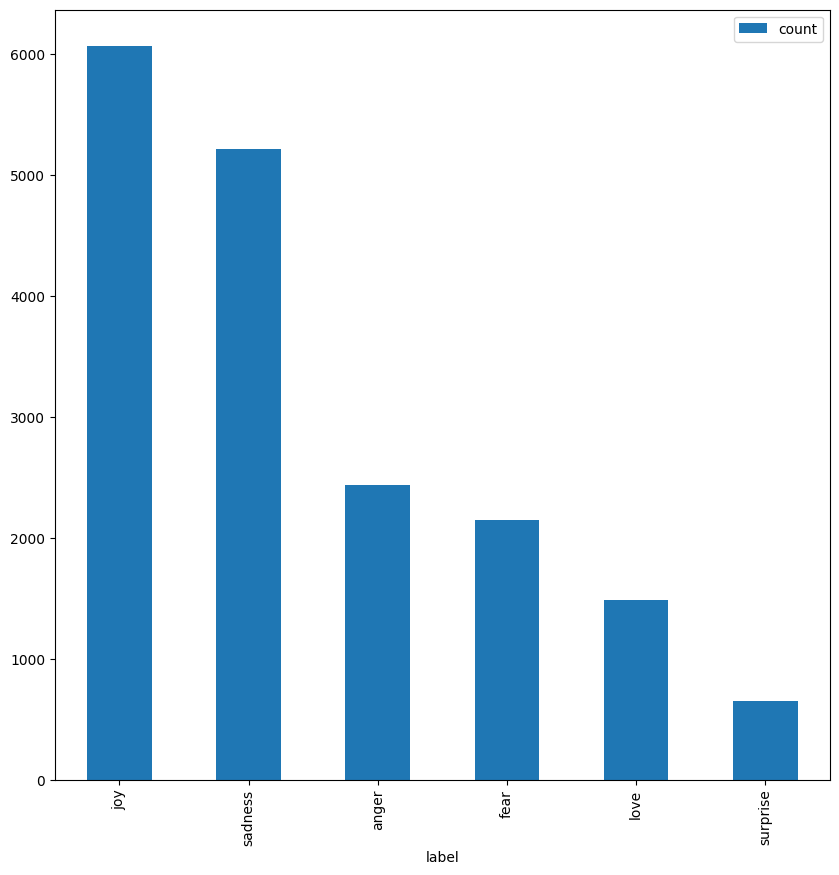

In [ ]:
dfLabel = dfResult.groupBy("label").count().orderBy(col("count").desc())
figLabel = dfLabel.toPandas().plot(kind='bar', figsize=(10, 10),x='label',y='count')
plt.show()

In [ ]:
from pyspark.sql import functions as f

parameter_list = ["joy", "surprise" , "love"]

dfResult_lm = dfResult\
  .withColumn("label_2",f.when(f.col("label").rlike('|'.join(parameter_list)),f.lit(1)).otherwise(f.lit(0)))\
  .withColumn("text_lm", udf_text_transformation(col("text")))\
  .select("text","text_lm","label","label_2")

dfResult_lm.show(5,truncate = False)

+------------------------------------------------------------------------------------------------------------+------------------------------------------------------------+-------+-------+
|text                                                                                                        |text_lm                                                     |label  |label_2|
+------------------------------------------------------------------------------------------------------------+------------------------------------------------------------+-------+-------+
|i didnt feel humiliated                                                                                     |didnt feel humiliated                                       |sadness|0      |
|i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake|go feeling hopeless damned hopeful around someone care awake|sadness|0      |
|im grabbing a minute to post i feel greedy wrong           

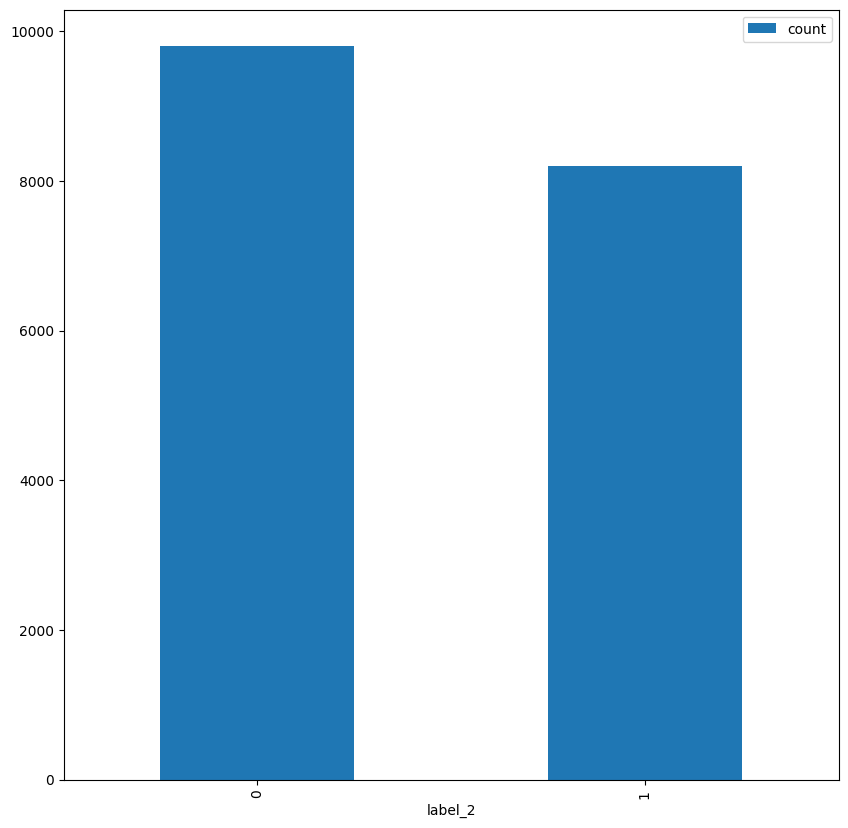

In [ ]:
dfLabel2 = dfResult_lm.groupBy("label_2").count().orderBy(col("count").desc())
figLabel2 = dfLabel2.toPandas().plot(kind='bar', figsize=(10, 10),x='label_2',y='count')
plt.show()

In [ ]:
def tokenization(list):
    corpus = []
    for item in list:
      new_item = item.split()
      corpus.append(str(new_item))
    return corpus

In [ ]:
trainCorpus = (tokenization(dfResult_lm.select("text_lm").rdd.flatMap(lambda x: x).collect()))
trainLabel = (dfResult_lm.select("label_2").rdd.flatMap(lambda x: x).collect())

In [ ]:
cv_2 = CountVectorizer(ngram_range=(1,2))
traindata = cv_2.fit_transform(trainCorpus)

X = traindata
y = trainLabel

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

grid_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions = random_grid,verbose=2,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
rfc = RandomForestClassifier(max_features = grid_search.best_params_['max_features'],
                                      max_depth = grid_search.best_params_['max_depth'],
                                      n_estimators = grid_search.best_params_['n_estimators'],
                                      min_samples_split = grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                                      bootstrap = grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

RandomForestClassifier(min_samples_leaf=4)

In [ ]:
dfTest = spark.read\
    .schema(sentimentSchema)\
    .option("inferSchema", "true")\
    .option("header", "false")\
    .option("delimiter", ";")\
    .csv("test.txt")

dfTest.show(5,truncate = False)

+-----------------------------------------------------------------------------------------------------------------+-------+
|text                                                                                                             |label  |
+-----------------------------------------------------------------------------------------------------------------+-------+
|im feeling rather rotten so im not very ambitious right now                                                      |sadness|
|im updating my blog because i feel shitty                                                                        |sadness|
|i never make her separate from me because i don t ever want her to feel like i m ashamed with her                |sadness|
|i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived|joy    |
|i was feeling a little vain when i did this one                                                                  |sadness|
+-------

In [ ]:
from pyspark.sql import functions as f

dfTest_lm = dfTest\
  .withColumn("label_2",f.when(f.col("label").rlike('|'.join(parameter_list)),f.lit(1)).otherwise(f.lit(0)))\
  .withColumn("text_lm", udf_text_transformation(col("text")))\
  .select("text","text_lm","label","label_2")

dfTest_lm.show(5,truncate = False)

+-----------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------+-------+-------+
|text                                                                                                             |text_lm                                                              |label  |label_2|
+-----------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------+-------+-------+
|im feeling rather rotten so im not very ambitious right now                                                      |im feeling rather rotten im ambitious right                          |sadness|0      |
|im updating my blog because i feel shitty                                                                        |im updating blog feel shitty                                         |sadness

In [ ]:
testCorpus = (tokenization(dfTest_lm.select("text_lm").rdd.flatMap(lambda x: x).collect()))
testLabel = (dfTest_lm.select("label_2").rdd.flatMap(lambda x: x).collect())

In [ ]:
testdata = cv_2.transform(testCorpus)

In [ ]:
print(shape(traindata))
print(shape(testdata))

(18000, 117429)
(2000, 117429)


In [ ]:
X_test,y_test = testdata,testLabel

predictions = rfc.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy score: ',acc_score)
print('Precision score: ',pre_score)
print('Recall score: ',rec_score)
print("~"*55)
cr = classification_report(y_test,predictions)
print(cr)

Accuracy score:  0.9595
Precision score:  0.9750849377123443
Recall score:  0.9358695652173913
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1080
           1       0.98      0.94      0.96       920

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



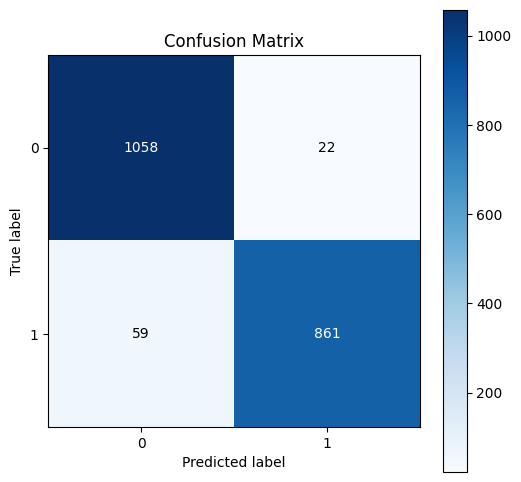

In [ ]:
plot_confusion_matrix(y_test,predictions,figsize=(6,6))
plt.show()

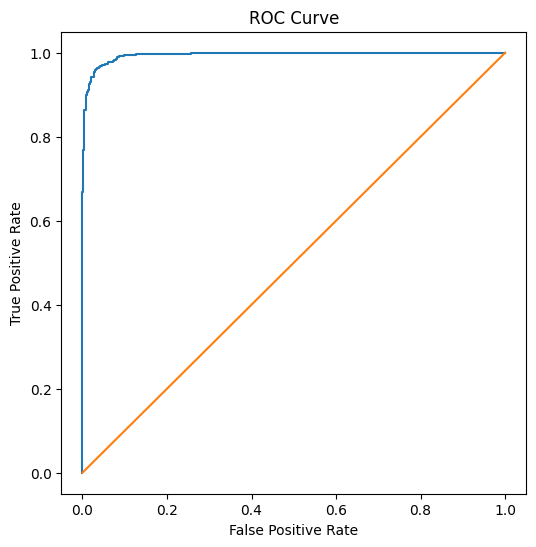

In [ ]:
plt.figure(figsize =(6, 6))

predictions_probability = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###Prediction on our sample of tweets

In [ ]:
goalCorpus = (tokenization(dfTweets5_lm.select("text").rdd.flatMap(lambda x: x).collect()))
print(goalCorpus)

["['suckin', 'macron', 'zelly', 'dick']", "['french', 'smell', 'bad', 'country', 'stinky', 'sissy', 'like', 'macron']", "['boris', 'johnson', 'sunak', 'biden', 'macron', 'check', 'conspiracy', 'mind', 'video', 'tiktok']", "['boris', 'johnson', 'aide', 'guto', 'harri', 'report', 'johnson', 'said', 'emmanel', 'macron', 'french', 'people', 'need', 'orgy', 'frogbashing', 'going', 'punch', 'light']", "['macron']", "['macron', 'terrible', 'leader', 'going', 'get', 'worse', 'already', 'see', 'around', 'younger', 'generation', 'leader', 'bad', 'bad', 'worse', 'also', 'already', 'seen', 'economical', 'financial', 'industrial', 'intelectual', 'elite']", "['obama', 'merkel', 'macron', 'trudeau', 'etc', 'give', 'lethal', 'weapon', 'forced']", "['show', 'paris', 'invite', 'visit', 'blog', 'zelensky', 'scholz', 'ukraine', 'russia', 'russianukrainianwar', 'moscow', 'zeldatearsofthekingdom', 'russiaisaterroriststate', 'paryż', 'paris', 'germany', 'brussels']", "['macron', 'win']", "['emanuel', 'macron

In [ ]:
goaldata = cv_2.transform(goalCorpus)
goalPredictions = rfc.predict(goaldata)

In [ ]:
def scoreGoal(list):
  s = 0
  t = len(list)
  for i in range(t):
    s+=list[i]
  return s/t

score = scoreGoal(goalPredictions)

print(score)

0.09066666666666667


In [ ]:
def setcolor (score):
  if (score <= 0.5) :
    color = "red"
  elif (0.5 < score <= 0.75) :
    color = "orange"
  elif (0.75 < score ) :
    color = "green"
  return color

color = setcolor(score)

In [ ]:
scoreFig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = score,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': str("Twittosphere sentiment about " + topic), 'font': {'size': 24}},
    gauge = {
        'axis': {'range': [None, 1], 'tickwidth': 1, 'tickcolor': "slategray"},
        'bar': {'color': color},
        'borderwidth': 1,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 1], 'color': 'darkseagreen'}],
        'threshold': {
            'line': {'color': "black", 'width': 10},
            'thickness': 0.75,
            'value': score}}))


scoreFig.update_layout(
    font_family="Arial",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green")

scoreFig.update_layout(
    title={
        'y':0.5,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


#scoreFig.update_xaxes(title_font_family="Arial")
scoreFig.show()


In [ ]:
print(goalCorpus[504])
print(goalCorpus[500])
print(goalCorpus[3])
print(goalCorpus[125])
print(goalCorpus[368])

['wef', 'world', 'leader', 'biden', 'trudeau', 'macron', 'kind', 'monster', 'intentionally', 'set', 'forest', 'fire', 'burn', 'alive', 'wild', 'life', 'poison', 'u', 'evil', 'evil']
['president', 'macron', 'give', 'update', 'british', 'girl', 'stabbed', 'annecy', 'attack']
['boris', 'johnson', 'aide', 'guto', 'harri', 'report', 'johnson', 'said', 'emmanel', 'macron', 'french', 'people', 'need', 'orgy', 'frogbashing', 'going', 'punch', 'light']
['macron', 'police', 'shoot', 'young', 'woman', 'incredible', 'violence', 'taliban', 'approve']
['news', 'macron', 'little', 'stem', 'flow', 'illegal', 'migration']


###Second test

In [ ]:
!twarc2 search "putin" test2.jsonl
!twarc2 csv --extra-input-columns "public_metrics.bookmark_count" test2.jsonl test2.csv

  0% 1095000/604770000 [00:53<8:10:57, 20493.05it/s]

Aborted!
100% 27.8M/27.8M [00:02<00:00, 10.0MB/s]

ℹ️
Parsed 3200 tweets objects from 32 lines in the input file.
Wrote 3200 rows and output 84 columns in the CSV.



In [ ]:
dfTweetsTest2P = pd.read_csv("test2.csv")

dfTweetsTest2 = spark.createDataFrame(dfTweetsTest2P.astype(str))

dfTweetsTest2 = dfTweetsTest2\
        .withColumnRenamed("created_at","date")\
        .withColumnRenamed("author.username","userName")\
        .withColumnRenamed("author.name","name")\
        .withColumnRenamed("author.description","userBio")\
        .withColumnRenamed("author.verified","verified")\
        .withColumnRenamed("author.location","location")\
        .withColumnRenamed("public_metrics.retweet_count","retweets")\
        .withColumnRenamed("public_metrics.like_count","likes")\
        .withColumnRenamed("public_metrics.reply_count","replies")\
        .select("date","userName","name","userBio","verified","location","text","replies","retweets","likes","lang")\
        .withColumn("date",col("date").cast(TimestampType()))\
        .withColumn("text",col("text").cast(StringType()))\
        .withColumn("likes",col("likes").cast(IntegerType()))\
        .withColumn("replies",col("replies").cast(IntegerType()))\
        .withColumn("retweets",col("retweets").cast(IntegerType()))\
        .filter(col("lang") == "en")\
        .select("text","lang",f.regexp_replace(f.col("text"), "https[^\s]+", "").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "@[^\s]+", "").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "\\\\n"," ").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "-", "").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), '\[|\]', " ").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), '"', " ").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "[0-9]", "").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "[" u"é" u"è" u"ë" u"ê" u"è" "]", "e").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "["u"i" u"î" u"ï""]", "i").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "["u"ô" "]", "o").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "["u"à" u"á""]", "a").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "[«»!#“”$%&’'() "u" " u"*+,‘./:—€…;·<=>?@\^_`{|}~+]", " ").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                      "]+"," ").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "    ", " ").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "   ", " ").alias("replace"))\
        .select("text","lang",f.regexp_replace(f.col("replace"), "  ", " ").alias("replace"))\
        .select("text","lang",f.lower(f.col("replace")).alias("replace"))\
        .select("text","replace","lang").dropDuplicates()\
        .withColumn("text", udf_text_transformation(col("replace")))\
        .select("text")

corpusTest2 = (tokenization(dfTweetsTest2.select("text").rdd.flatMap(lambda x: x).collect()))

goaldataTest2 = cv_2.transform(corpusTest2)
goalPredictionsTest2 = rfc.predict(goaldataTest2)

scoreTest2 = scoreGoal(goalPredictionsTest2)

print(scoreTest2)

0.08366935483870967


In [ ]:
print(shape(corpusTest2))

(992,)


In [ ]:
print(corpusTest2[504])
print(corpusTest2[900])
print(corpusTest2[500])
print(corpusTest2[3])

['attack', 'russian', 'territory', 'continue', 'consider', 'creating', 'sanitary', 'zone', 'inside', 'ukraine', 'putin']
['wagner', 'group', 'mutiny', 'putin', 'mercenary', 'refuse', 'follow', 'order']
['come', 'kgalema', 'motlanthe', 'reveals', 'may', 'happen', 'putin', 'come', 'south', 'africa', 'info', 'click', 'link']
['guy', 'delivered', 'trump', 'letter', 'putin', 'know', 'law']


##Test in french with lemmatization

Get a dataframe with the twarc search command

In [ ]:
!twarc2 search "macron" macron.jsonl

  9% 54516898/604770000 [05:10<52:09, 175826.71it/s]  

Aborted!


In [ ]:
!twarc2 csv --extra-input-columns "public_metrics.bookmark_count" macron.jsonl macron.csv

Usage: twarc2 csv [OPTIONS] [INFILE] [OUTFILE]
Try 'twarc2 csv --help' for help.

Error: Invalid value for '[INFILE]': 'macron.jsonl': No such file or directory


In [ ]:
dfTweets = pd.read_csv("macron.csv")
dfTweets = spark.createDataFrame(dfTweets.astype(str))
#dfTweets.show(10, truncate= False)

Here I use Pandas to read the csv file because I had separator issues reading it with Spark

In [ ]:
dfTweets2 = dfTweets.withColumnRenamed("created_at","date")\
        .withColumnRenamed("author.username","userName")\
        .withColumnRenamed("author.name","name")\
        .withColumnRenamed("author.description","userBio")\
        .withColumnRenamed("author.verified","verified")\
        .withColumnRenamed("author.location","location")\
        .withColumnRenamed("public_metrics.retweet_count","retweets")\
        .withColumnRenamed("public_metrics.like_count","likes")\
        .withColumnRenamed("public_metrics.reply_count","replies")

#dfTweets2.show()


In [ ]:
dfTweets3 =  dfTweets2.select("date","userName","name","userBio","verified","location","text","replies","retweets","likes","lang")

#dfTweets3.show(50)
#print(dfTweets3.count())

In [ ]:
dfTweets4 = dfTweets3\
  .withColumn("date",col("date").cast(TimestampType()))\
  .withColumn("text",col("text").cast(StringType()))\
  .withColumn("likes",col("likes").cast(IntegerType()))\
  .withColumn("replies",col("replies").cast(IntegerType()))\
  .withColumn("retweets",col("retweets").cast(IntegerType()))

In [ ]:
import pyspark.sql.functions as f

dfTweets5 = dfTweets4\
          .filter(col("lang") == "fr")\
          .select("text","lang",f.regexp_replace(f.col("text"), "https[^\s]+", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "@[^\s]+", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "\\\\n"," ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "-", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), '\[|\]', " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), '"', " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[0-9]", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[" u"é" u"è" u"ë" u"ê" u"è" "]", "e").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"i" u"î" u"ï""]", "i").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"ô" "]", "o").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"à" u"á""]", "a").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[«»!#“”$%&’'() "u" " u"*+,‘./:—€…;·<=>?@\^_`{|}~+]", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                      "]+"," ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "    ", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "   ", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "  ", " ").alias("replace"))\
          .select("text","lang",f.lower(f.col("replace")).alias("replace"))\
          .select("text","replace","lang").dropDuplicates()\
          #u"\U0001F1E0-\U0001F1FF"  # flags (iOS)

In [ ]:
dfTweets5.show(10,truncate = False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+
|text                                                                                                                                                                                                                                                                                                                                 |replace                                                         

In [ ]:
tweeterStopwords = ['http','https','co','a','pr','transdev','ça','depuis','source','tant','donc','putin','macron']

specificStopWords = stopwords.words('french') + tweeterStopwords

#lm = WordNetLemmatizer()
lm = FrenchLefffLemmatizer()
print(specificStopWords)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
def text_transformation(myString):
    corpus = ""
    myString = myString.split()
    myString = [lm.lemmatize(word) for word in myString if word not in set(specificStopWords)]
    corpus+=(' '.join(str(x) for x in myString))
    return corpus

udf_text_transformation = udf(lambda x:text_transformation(x),StringType())

In [ ]:
dfTweets5_lm = dfTweets5\
  .withColumn("text", udf_text_transformation(col("replace")))\
  .select("text")

In [ ]:
dfTweets5_lm.show(5, truncate = False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                                                            |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|chaque foi petrin possible drame arrive france gilet jaune covid affaire benalla dame affaire rugy incendie usine lubrizol rouen scandale schiappa reforme retraite drame annecy|
|question combien attaque couteau semaine combien font gros titre apres annonce impopulaire gouvernement exemple oct annonce reconfinement oct attaque couteau nice france       |
|matos moque boucherie enfin si russe arrivent porte pourra escorter plus faire agent russe mission detru

In [ ]:
list_tweets = (dfTweets5_lm.select('text').rdd.flatMap(lambda x: x).collect())

In [ ]:
def list_split(list):
    corpus = []
    for item in list:
      new_item = item.split()
      corpus.append(new_item)
    flat_list = [item for sublist in corpus for item in sublist]
    return flat_list

In [ ]:
list_words = list_split(list_tweets)
print(list_words[0])
rdd = spark.sparkContext.parallelize(list_words)
dfWords = rdd.map(lambda x: (x,)).toDF().withColumnRenamed("_1","text")

chaque


In [ ]:
groupByWords = dfWords.groupBy("text").count()

dfWordCount = groupByWords.select("text","count")\
                .orderBy("count", ascending = False)\
                .filter(col("count") >= 5)

dfWordCount.show(10)

+--------+-----+
|    text|count|
+--------+-----+
|  france|  739|
|    plus|  714|
|    fait|  664|
|   comme|  576|
|    tout|  574|
|français|  497|
|   faire|  480|
|    bien|  447|
|  annecy|  447|
|emmanuel|  444|
+--------+-----+
only showing top 10 rows



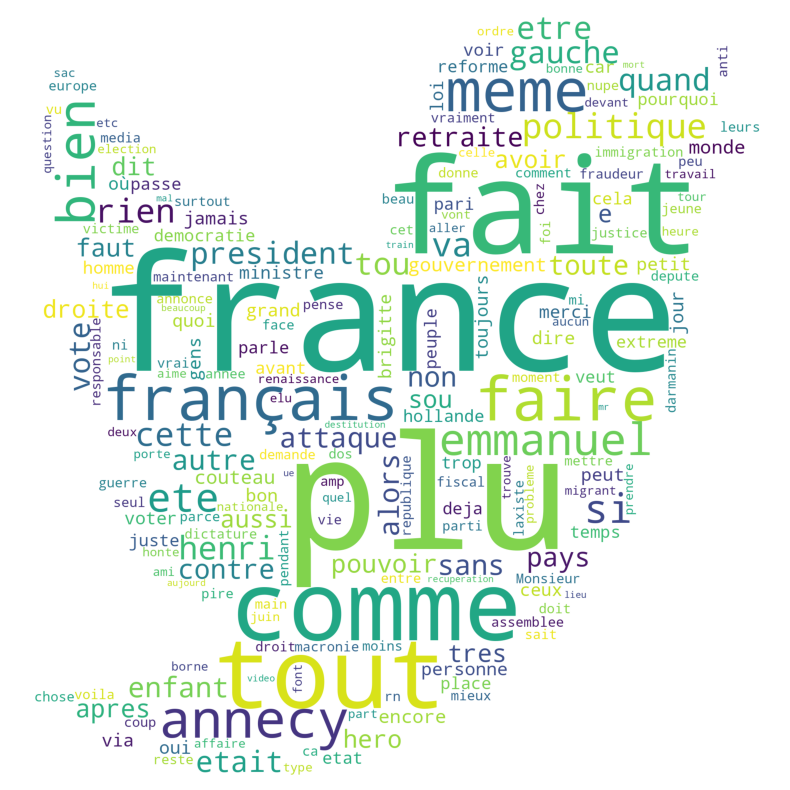

In [ ]:
plt.figure(figsize =(10, 10))

td = Image.open("Twitter_Bird.png")
td = td.resize((2000,2000))
td.save("td2.png")

mask = cv2.imread("img_24635.png",0)
mask2 = cv2.imread("td2.png",0)

ret1,mask2 = cv2.threshold(mask2,127,255,cv2.THRESH_BINARY_INV)
mask2 = cv2.blur(mask2, (25,25))

#ret1,mask2 = cv2.threshold(mask2,210,255,cv2.THRESH_BINARY)
#mask2 = cv2.blur(mask2, (25,25))
#plt.imshow(mask2)


word_cloud = ""

for i in range(len(list_words)):
  word_cloud = word_cloud + " " + list_words[i]

wordcloud = WordCloud(width = 1000, height = 1000,background_color ='white',collocations=False,min_font_size = 2,mask = mask2).generate(word_cloud)
plt.axis("off")
plt.imshow(wordcloud)

plt.show()

###Model Training

In [ ]:
sentimentSchema2 = StructType([ \
    StructField("label_2",IntegerType (),True), \
    StructField("text",StringType(),True), \
  ])

In [ ]:
dfTrain2 = spark.read\
    .schema(sentimentSchema2)\
    .option("inferSchema", "true")\
    .option("header", "false")\
    .option("delimiter", ",")\
    .csv("trainfr.txt")

dfTest2 = spark.read\
    .schema(sentimentSchema2)\
    .option("inferSchema", "true")\
    .option("header", "false")\
    .option("delimiter", ",")\
    .csv("testfr.txt")

In [ ]:
dfTrain2.show(10,truncate = False)

+-------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label_2|text                                                                                                                                                                             |
+-------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0      |Pourquoi doit-il avoir froid? Pourquoi dois-je être réveillé? Oh bien bonjour tout                                                                                               |
|0      |J'espère vraiment que ça va bien                                                                                                                                                 |
|0      |Oui, mais malheureusement, je ne peux pas faire de 

In [ ]:
dfTrain2inter = dfTrain2\
          .select("text","label_2",f.regexp_replace(f.col("text"), "-", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "https[^\s]+", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "@[^\s]+", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "\\\\n"," ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "-", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), '\[|\]', " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), '"', " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[0-9]", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[" u"é" u"è" u"ë" u"ê" u"è" "]", "e").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"i" u"î" u"ï""]", "i").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"ô" "]", "o").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"à" u"á""]", "a").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[«»!#“”$%&’'() "u" " u"*+,‘./\:—€…;·<=>?@\^_`{|}~+]", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                      "]+"," ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "    ", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "   ", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "  ", " ").alias("replace"))\
          .select("label_2",f.lower(f.col("replace")).alias("text"))\
          .where("label_2!=4")

In [ ]:
dfTest2inter = dfTest2\
          .select("text","label_2",f.regexp_replace(f.col("text"), "-", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "https[^\s]+", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "@[^\s]+", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "\\\\n"," ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "-", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), '\[|\]', " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), '"', " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[0-9]", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[" u"é" u"è" u"ë" u"ê" u"è" "]", "e").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"i" u"î" u"ï""]", "i").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"ô" "]", "o").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"à" u"á""]", "a").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[«»!#“”$%&’'() "u" " u"*+,‘./\:—€…;·<=>?@\^_`{|}~+]", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                      "]+"," ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "    ", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "   ", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "  ", " ").alias("replace"))\
          .select("label_2",f.lower(f.col("replace")).alias("text"))\
          .where("label_2!=4")



In [ ]:
from pyspark.sql import functions as f

dfTrain2_lm = dfTrain2inter\
  .withColumn("text_lm", udf_text_transformation(col("text")))\
  .select("text","text_lm","label_2")

dfTrain2_lm.show(10,truncate = False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+-------+
|text                                                                                                                                                                         |text_lm                                                                                                                |label_2|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+-------+
|pourquoi doit il avoir froid pourquoi dois je etre reveille oh bien bonjour tout       

In [ ]:
dfTest2_lm = dfTest2inter\
  .withColumn("text_lm", udf_text_transformation(col("text")))\
  .select("text","text_lm","label_2")

dfTest2_lm.show(5,truncate = False)

+------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------+-------+
|text                                                                                                                          |text_lm                                                                                      |label_2|
+------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------+-------+
|je n ai dine pas beaucoup d appetit                                                                                           |dine beaucoup appetit                                                                        |0      |
|mon code de reduction ne fait pas beaucoup de difference si vous achetez de

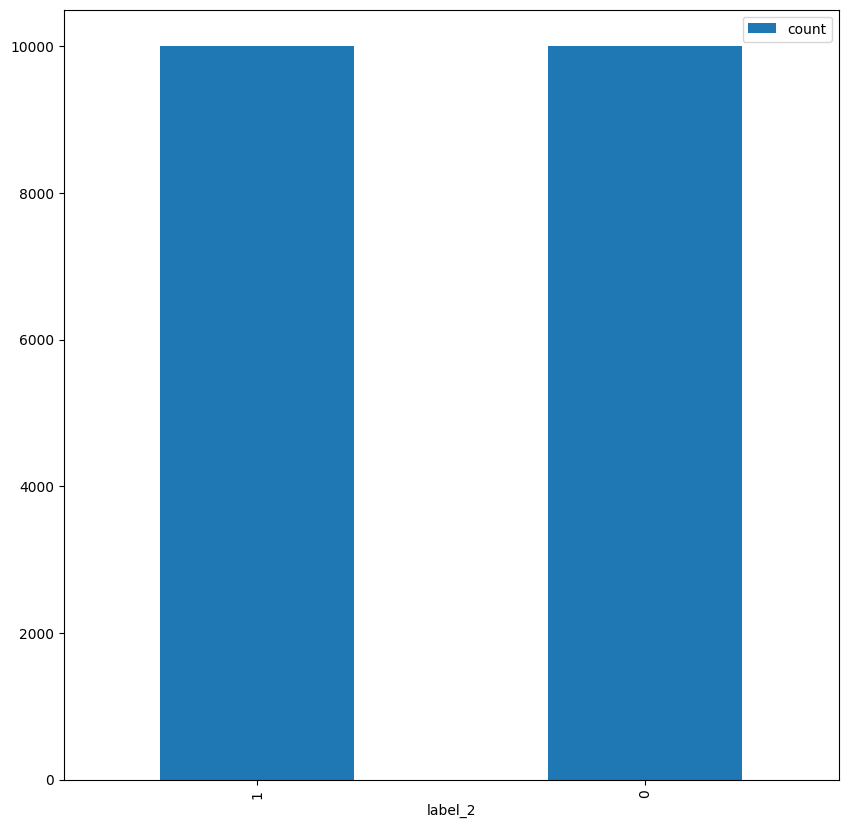

In [ ]:
dfLabel3 = dfTrain2_lm.groupBy("label_2").count().orderBy(col("count").desc())
figLabel3 = dfLabel3.toPandas().plot(kind='bar', figsize=(10, 10),x='label_2',y='count')
plt.show()

In [ ]:
def tokenization(list):
    corpus = []
    for item in list:
      new_item = item.split()
      corpus.append(str(new_item))
    return corpus

In [ ]:
trainCorpus3 = (tokenization(dfTrain2_lm.select("text_lm").rdd.flatMap(lambda x: x).collect()))

trainLabel3 = (dfTrain2_lm.select("label_2").rdd.flatMap(lambda x: x).collect())

In [ ]:
cv_2 = CountVectorizer(ngram_range=(1,2))
traindata3 = cv_2.fit_transform(trainCorpus3)

X = traindata3
y = trainLabel3

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

grid_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions = random_grid,verbose=2,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [ ]:
for i in range(10):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}
Mean Test Score:  0.7024
Rank:  2
Parameters:  {'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Mean Test Score:  0.6877500000000001
Rank:  6
Parameters:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}
Mean Test Score:  0.68225
Rank:  7
Parameters:  {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Mean Test Score:  0.64555
Rank:  10
Parameters:  {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}
Mean Test Score:  0.6571
Rank:  9
Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'ma

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

RandomForestClassifier(max_depth=110, min_samples_split=5)

In [ ]:
rfc = RandomForestClassifier(max_features='auto',#grid_search.best_params_['max_features'],
                                      max_depth=None,#grid_search.best_params_['max_depth'],
                                      n_estimators=2000,#=grid_search.best_params_['n_estimators'],
                                      min_samples_split=2,#grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=4,#grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=True)#grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

RandomForestClassifier(max_features='auto', min_samples_leaf=4,
                       n_estimators=2000)

In [ ]:
testCorpus3 = (tokenization(dfTest2_lm.select("text_lm").rdd.flatMap(lambda x: x).collect()))

testLabel3 = (dfTest2_lm.select("label_2").rdd.flatMap(lambda x: x).collect())


In [ ]:
testdata3 = cv_2.transform(testCorpus3)

In [ ]:
X_test3,y_test3 = testdata3,testLabel3

#predict the target
predictions3 = rfc.predict(X_test3)

In [ ]:
acc_score3 = accuracy_score(y_test3,predictions3)
pre_score3 = precision_score(y_test3,predictions3)
rec_score3 = recall_score(y_test3,predictions3)
print('Accuracy score: ',acc_score3)
print('Precision score: ',pre_score3)
print('Recall score: ',rec_score3)
print("~"*55)
cr3 = classification_report(y_test3,predictions3)
print(cr3)

Accuracy score:  0.7185
Precision score:  0.705937794533459
Recall score:  0.749
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.71      0.75      0.73      1000

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



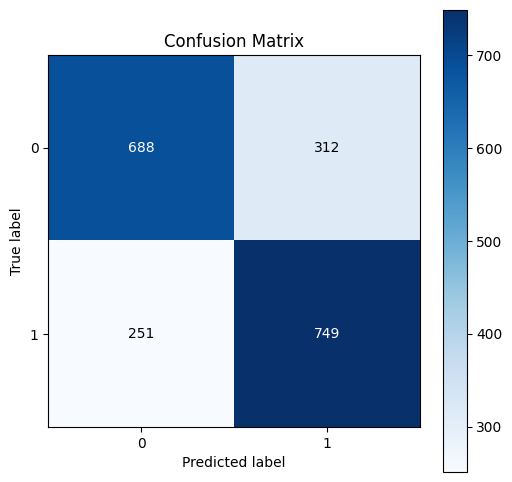

In [ ]:
plot_confusion_matrix(y_test3,predictions3,figsize=(6,6))
plt.show()

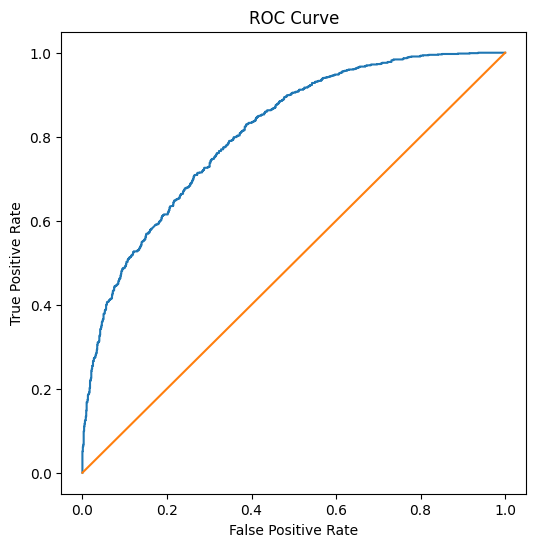

In [ ]:
plt.figure(figsize =(6, 6))

predictions_probability = rfc.predict_proba(testdata3)
fpr3,tpr3,thresholds3 = roc_curve(y_test3,predictions_probability[:,1])
plt.plot(fpr3,tpr3)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###Prediction on our sample of tweets

In [ ]:
goalCorpus3 = (tokenization(dfTweets5_lm.select("text").rdd.flatMap(lambda x: x).collect()))
print(goalCorpus3)

["['chaque', 'foi', 'petrin', 'possible', 'drame', 'arrive', 'france', 'gilet', 'jaune', 'covid', 'affaire', 'benalla', 'dame', 'affaire', 'rugy', 'incendie', 'usine', 'lubrizol', 'rouen', 'scandale', 'schiappa', 'reforme', 'retraite', 'drame', 'annecy']", "['question', 'combien', 'attaque', 'couteau', 'semaine', 'combien', 'font', 'gros', 'titre', 'apres', 'annonce', 'impopulaire', 'gouvernement', 'exemple', 'oct', 'annonce', 'reconfinement', 'oct', 'attaque', 'couteau', 'nice', 'france']", "['matos', 'moque', 'boucherie', 'enfin', 'si', 'russe', 'arrivent', 'porte', 'pourra', 'escorter', 'plus', 'faire', 'agent', 'russe', 'mission', 'detruire', 'armee', 'vais', 'peut', 'etre', 'peu', 'fort']", "['suite', 'peu', 'ordre', 'discipline', 'permettraient', 'regler', 'beaucoup', 'problemes', 'sans', 'avoir', 'recours', 'mesure', 'restreignent', 'libertes', 'incompetents', 'capables']", "['emmanuel', 'aussi', 'appele', 'devant', 'justice']", "['oui', 'an', 'etait', 'seulement', 'cas', 'où', 

In [ ]:
goaldata3 = cv_2.transform(goalCorpus3)
goalPredictions3 = rfc.predict(goaldata3)

In [ ]:
def scoreGoal(list):
  s = 0
  t = len(list)
  for i in range(t):
    s+=list[i]
  return s/t

score3 = scoreGoal(goalPredictions3)

print(score3)

0.605134074558535


In [ ]:
def setcolor (score):
  if (score <= 0.5) :
    color = "red"
  elif (0.5 < score <= 0.75) :
    color = "orange"
  elif (0.75 < score ) :
    color = "green"
  return color

color3 = setcolor(score3)

In [ ]:
scoreFig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = score3,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': str("Twittosphere sentiment about Macron" ), 'font': {'size': 24}},
    gauge = {
        'axis': {'range': [None, 1], 'tickwidth': 1, 'tickcolor': "slategray"},
        'bar': {'color': color3},
        'borderwidth': 1,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 1], 'color': 'darkseagreen'}],
        'threshold': {
            'line': {'color': "black", 'width': 10},
            'thickness': 0.75,
            'value': score3}}))


scoreFig.update_layout(
    font_family="Arial",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green")

scoreFig.update_layout(
    title={
        'y':0.5,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


#scoreFig.update_xaxes(title_font_family="Arial")
scoreFig.show()


##Test in french with stemming

Get a dataframe with the twarc search command

In [ ]:
!twarc2 search "macron" extraction.jsonl

In [ ]:
!twarc2 csv extraction.jsonl extraction.csv

100% 14.3M/14.3M [00:02<00:00, 5.55MB/s]

ℹ️
Parsed 3699 tweets objects from 37 lines in the input file.
Wrote 3699 rows and output 74 columns in the CSV.



In [ ]:
dfTweets = pd.read_csv("macron.csv")
dfTweets = spark.createDataFrame(dfTweets.astype(str))
#dfTweets.show(10, truncate= False)

Here I use Pandas to read the csv file because I had separator issues reading it with Spark

In [ ]:
dfTweets2 = dfTweets.withColumnRenamed("created_at","date")\
        .withColumnRenamed("author.username","userName")\
        .withColumnRenamed("author.name","name")\
        .withColumnRenamed("author.description","userBio")\
        .withColumnRenamed("author.verified","verified")\
        .withColumnRenamed("author.location","location")\
        .withColumnRenamed("public_metrics.retweet_count","retweets")\
        .withColumnRenamed("public_metrics.like_count","likes")\
        .withColumnRenamed("public_metrics.reply_count","replies")

#dfTweets2.show()


In [ ]:
dfTweets3 =  dfTweets2.select("date","userName","name","userBio","verified","location","text","replies","retweets","likes","lang")

#dfTweets3.show(50)
#print(dfTweets3.count())

In [ ]:
dfTweets4 = dfTweets3\
  .withColumn("date",col("date").cast(TimestampType()))\
  .withColumn("text",col("text").cast(StringType()))\
  .withColumn("likes",col("likes").cast(IntegerType()))\
  .withColumn("replies",col("replies").cast(IntegerType()))\
  .withColumn("retweets",col("retweets").cast(IntegerType()))

In [ ]:
import pyspark.sql.functions as f

dfTweets5 = dfTweets4\
          .filter(col("lang") == "fr")\
          .select("text","lang",f.regexp_replace(f.col("text"), "https[^\s]+", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "@[^\s]+", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "\\\\n"," ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "-", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), '\[|\]', " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), '"', " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[0-9]", "").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[" u"é" u"è" u"ë" u"ê" u"è" "]", "e").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"i" u"î" u"ï""]", "i").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"ô" "]", "o").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["u"à" u"á""]", "a").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "[«»!#“”$%&’'() "u" " u"*+,‘./:—€…;·<=>?@\^_`{|}~+]", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                      "]+"," ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "    ", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "   ", " ").alias("replace"))\
          .select("text","lang",f.regexp_replace(f.col("replace"), "  ", " ").alias("replace"))\
          .select("text","lang",f.lower(f.col("replace")).alias("replace"))\
          .select("text","replace","lang").dropDuplicates()\
          #u"\U0001F1E0-\U0001F1FF"  # flags (iOS)

In [ ]:
dfTweets5.show(10,truncate = False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+
|text                                                                                                                                                                                                                                                                                                                                 |replace                                                         

In [ ]:
tweeterStopwords = ['http','https','co','a','pr','transdev','ça','depuis','source','tant','donc','putin']

specificStopWords = stopwords.words('french') + tweeterStopwords

#lm = WordNetLemmatizer()
stemmer = FrenchStemmer()
lm = FrenchLefffLemmatizer()
print(specificStopWords)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
def text_transformation(myString):
    corpus = ""
    myString = myString.split()
    #myString = [lm.lemmatize(word) for word in myString if word not in set(specificStopWords)]
    myString = [stemmer.stem(word) for word in myString if word not in set(specificStopWords)]
    corpus+=(' '.join(str(x) for x in myString))
    return corpus

udf_text_transformation = udf(lambda x:text_transformation(x),StringType())

In [ ]:
dfTweets5_lm = dfTweets5\
  .withColumn("text", udf_text_transformation(col("replace")))\
  .select("text")

In [ ]:
dfTweets5_lm.show(5, truncate = False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                                                  |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|chaqu fois macron petrin possibl dram arriv franc gilet jaun covid affair benall dam affair rugy incend usin lubrizol rouen scandal schiapp reform retrait dram annecy|
|question combien attaqu couteau semain combien font gros titr apre annonc impopulair gouvern exempl oct macron annonc reconfin oct attaqu couteau nic franc           |
|matos moqu boucher enfin si russ arrivent port pourr escort plus fair macron agent russ mission detruir arme vais peut etre peu fort                      

###Model Training

In [ ]:
sentimentSchema2 = StructType([ \
    StructField("label_2",IntegerType (),True), \
    StructField("text",StringType(),True), \
  ])

In [ ]:
dfTrain2 = spark.read\
    .schema(sentimentSchema2)\
    .option("inferSchema", "true")\
    .option("header", "false")\
    .option("delimiter", ",")\
    .csv("trainfr.txt")

dfTest2 = spark.read\
    .schema(sentimentSchema2)\
    .option("inferSchema", "true")\
    .option("header", "false")\
    .option("delimiter", ",")\
    .csv("testfr.txt")

In [ ]:
dfTrain2.show(10,truncate = False)

+-------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label_2|text                                                                                                                                                                             |
+-------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0      |Pourquoi doit-il avoir froid? Pourquoi dois-je être réveillé? Oh bien bonjour tout                                                                                               |
|0      |J'espère vraiment que ça va bien                                                                                                                                                 |
|0      |Oui, mais malheureusement, je ne peux pas faire de 

In [ ]:
import pyspark.sql.functions as f

dfTrain2inter = dfTrain2\
          .select("text","label_2",f.regexp_replace(f.col("text"), "-", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "https[^\s]+", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "@[^\s]+", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "\\\\n"," ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "-", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), '\[|\]', " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), '"', " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[0-9]", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[" u"é" u"è" u"ë" u"ê" u"è" "]", "e").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"i" u"î" u"ï""]", "i").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"ô" "]", "o").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"à" u"á""]", "a").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[«»!#“”$%&’'() "u" " u"*+,‘./\:—€…;·<=>?@\^_`{|}~+]", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                      "]+"," ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "    ", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "   ", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "  ", " ").alias("replace"))\
          .select("label_2",f.lower(f.col("replace")).alias("text"))\
          .where("label_2!=4")

In [ ]:
dfTest2inter = dfTest2\
          .select("text","label_2",f.regexp_replace(f.col("text"), "-", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "https[^\s]+", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "@[^\s]+", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "\\\\n"," ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "-", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), '\[|\]', " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), '"', " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[0-9]", "").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[" u"é" u"è" u"ë" u"ê" u"è" "]", "e").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"i" u"î" u"ï""]", "i").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"ô" "]", "o").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["u"à" u"á""]", "a").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "[«»!#“”$%&’'() "u" " u"*+,‘./\:—€…;·<=>?@\^_`{|}~+]", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                      "]+"," ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "    ", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "   ", " ").alias("replace"))\
          .select("text","label_2",f.regexp_replace(f.col("replace"), "  ", " ").alias("replace"))\
          .select("label_2",f.lower(f.col("replace")).alias("text"))\
          .where("label_2!=4")



In [ ]:
dfTrain2_lm = dfTrain2inter\
  .withColumn("text_lm", udf_text_transformation(col("text")))\
  .select("text","text_lm","label_2")

dfTrain2_lm.show(5,truncate = False)

+---------------------------------------------------------------------------------------+------------------------------------------------------------------------+-------+
|text                                                                                   |text_lm                                                                 |label_2|
+---------------------------------------------------------------------------------------+------------------------------------------------------------------------+-------+
|pourquoi doit il avoir froid pourquoi dois je etre reveille oh bien bonjour tout       |pourquoi doit avoir froid pourquoi dois etre reveil oh bien bonjour tout|0      |
|j espere vraiment que ça va bien                                                       |esper vrai va bien                                                      |0      |
|oui mais malheureusement je ne peux pas faire de l engagement familial depuis toujours |oui malheur peux fair engag familial toujour            

In [ ]:
dfTest2_lm = dfTest2inter\
  .withColumn("text_lm", udf_text_transformation(col("text")))\
  .select("text","text_lm","label_2")

dfTest2_lm.show(5,truncate = False)

+------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+-------+
|text                                                                                                                          |text_lm                                                                          |label_2|
+------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+-------+
|je n ai dine pas beaucoup d appetit                                                                                           |din beaucoup appet                                                               |0      |
|mon code de reduction ne fait pas beaucoup de difference si vous achetez de clandestin code taylor de rabais               

In [ ]:
trainCorpus3 = (tokenization(dfTrain2_lm.select("text_lm").rdd.flatMap(lambda x: x).collect()))

trainLabel3 = (dfTrain2_lm.select("label_2").rdd.flatMap(lambda x: x).collect())


In [ ]:
cv_2 = CountVectorizer(ngram_range=(1,2))
traindata3 = cv_2.fit_transform(trainCorpus3)

X = traindata3
y = trainLabel3

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

grid_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions = random_grid,verbose=2,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

{'n_estimators': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
for i in range(10):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'n_estimators': 94, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Mean Test Score:  0.69465
Rank:  7
Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
Mean Test Score:  0.70505
Rank:  1
Parameters:  {'n_estimators': 55, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Mean Test Score:  0.6942499999999999
Rank:  9
Parameters:  {'n_estimators': 66, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': False}
Mean Test Score:  0.7002
Rank:  5
Parameters:  {'n_estimators': 72, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}
Mean Test Score:  0.7020000000000001
Rank:  3
Parameters:  {'n_estimators': 83, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feature

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

RandomForestClassifier(max_depth=80, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10)

Paramètres trouvés lors d'une exécution précédente :

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 94}


In [ ]:
testCorpus3 = (tokenization(dfTest2_lm.select("text_lm").rdd.flatMap(lambda x: x).collect()))

testLabel3 = (dfTest2_lm.select("label_2").rdd.flatMap(lambda x: x).collect())


In [ ]:
testdata3 = cv_2.transform(testCorpus3)

In [ ]:
X_test3,y_test3 = testCorpus3,testLabel3

#predict the target
predictions3 = rfc.predict(testdata3)

In [ ]:
acc_score3 = accuracy_score(y_test3,predictions3)
pre_score3 = precision_score(y_test3,predictions3)
rec_score3 = recall_score(y_test3,predictions3)
print('Accuracy score: ',acc_score3)
print('Precision score: ',pre_score3)
print('Recall score: ',rec_score3)
print("~"*55)
cr3 = classification_report(y_test3,predictions3)
print(cr3)

Accuracy score:  0.725
Precision score:  0.7064220183486238
Recall score:  0.77
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1000
           1       0.71      0.77      0.74      1000

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.72      2000
weighted avg       0.73      0.72      0.72      2000



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

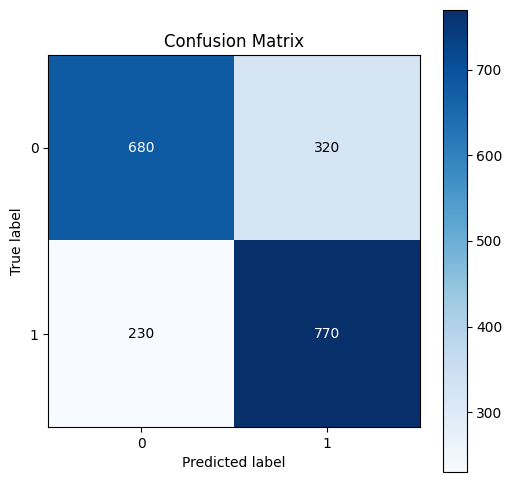

In [ ]:
plot_confusion_matrix(y_test3,predictions3,figsize=(6,6))

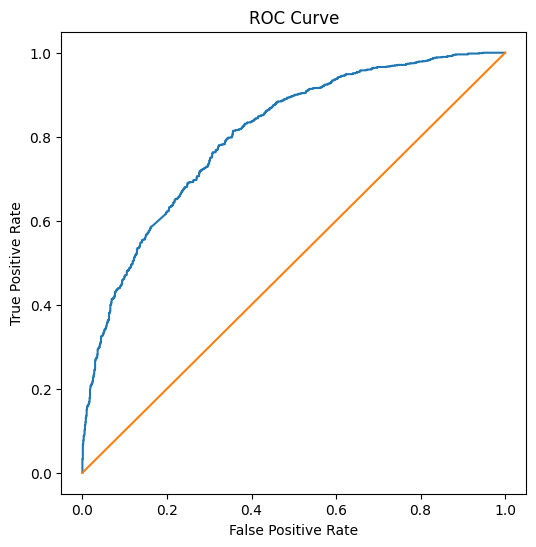

In [ ]:
plt.figure(figsize =(6, 6))

predictions_probability = rfc.predict_proba(testdata3)
fpr3,tpr3,thresholds3 = roc_curve(y_test3,predictions_probability[:,1])
plt.plot(fpr3,tpr3)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###Prediction on our sample of tweets

In [ ]:
goalCorpus3 = (tokenization(dfTweets5_lm.select("text").rdd.flatMap(lambda x: x).collect()))
print(goalCorpus3)

["['chaqu', 'fois', 'macron', 'petrin', 'possibl', 'dram', 'arriv', 'franc', 'gilet', 'jaun', 'covid', 'affair', 'benall', 'dam', 'affair', 'rugy', 'incend', 'usin', 'lubrizol', 'rouen', 'scandal', 'schiapp', 'reform', 'retrait', 'dram', 'annecy']", "['question', 'combien', 'attaqu', 'couteau', 'semain', 'combien', 'font', 'gros', 'titr', 'apre', 'annonc', 'impopulair', 'gouvern', 'exempl', 'oct', 'macron', 'annonc', 'reconfin', 'oct', 'attaqu', 'couteau', 'nic', 'franc']", "['matos', 'moqu', 'boucher', 'enfin', 'si', 'russ', 'arrivent', 'port', 'pourr', 'escort', 'plus', 'fair', 'macron', 'agent', 'russ', 'mission', 'detruir', 'arme', 'vais', 'peut', 'etre', 'peu', 'fort']", "['suit', 'peu', 'ordre', 'disciplin', 'permettr', 'regl', 'beaucoup', 'problem', 'san', 'avoir', 'recour', 'mesur', 'restreignent', 'libert', 'macron', 'incompetent', 'capabl']", "['emmanuel', 'macron', 'auss', 'appel', 'dev', 'justic']", "['oui', 'an', 'etait', 'seul', 'cas', 'où', 'shain', 'ete', 'petit', 'niec

In [ ]:
goaldata3 = cv_2.transform(goalCorpus3)
goalPredictions3 = rfc.predict(goaldata3)

In [ ]:
def scoreGoal(list):
  s = 0
  t = len(list)
  for i in range(t):
    s+=list[i]
  return s/t

score3 = scoreGoal(goalPredictions3)

print(score3)

0.6484630477436233


In [ ]:
def setcolor (score):
  if (score <= 0.5) :
    color = "red"
  elif (0.5 < score <= 0.75) :
    color = "orange"
  elif (0.75 < score ) :
    color = "green"
  return color

color3 = setcolor(score3)

In [ ]:
scoreFig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = score3,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': str("Twittosphere sentiment about Macron" ), 'font': {'size': 24}},
    gauge = {
        'axis': {'range': [None, 1], 'tickwidth': 1, 'tickcolor': "slategray"},
        'bar': {'color': color3},
        'borderwidth': 1,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 1], 'color': 'darkseagreen'}],
        'threshold': {
            'line': {'color': "black", 'width': 10},
            'thickness': 0.75,
            'value': score3}}))


scoreFig.update_layout(
    font_family="Arial",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green")

scoreFig.update_layout(
    title={
        'y':0.5,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


#scoreFig.update_xaxes(title_font_family="Arial")
scoreFig.show()


#VI : Engagement Analysis

In [ ]:
!twarc2 timeline 1976143068 timeline.jsonl

API limit of 3200 reached:  29% 3250/11339 [00:23<00:59, 136.19it/s]


In [ ]:
!twarc2 csv timeline.jsonl timeline.csv

dfTimelineP = pd.read_csv("timeline.csv")
dfTimeline = spark.createDataFrame(dfTimelineP.astype(str))

100% 6.90M/6.90M [00:01<00:00, 4.43MB/s]

ℹ️
Parsed 3250 tweets objects from 33 lines in the input file.
Wrote 3250 rows and output 74 columns in the CSV.



In [ ]:
!twarc2 user id 1976143068 user.json

In [ ]:
dfUser = spark.read.option("multiline","true").json("user.json")

dfUser2 = dfUser.select(explode("data").alias("data"))
metadata = dfUser2.select(col("data")).collect()[0][0]

print(metadata)

Row(created_at='2013-10-20T19:35:28.000Z', description='Président de la République française.', entities=Row(url=Row(urls=[Row(display_url='elysee.fr', end=23, expanded_url='http://elysee.fr', start=0, url='https://t.co/n76au37OVm')])), id='1976143068', location='France', name='Emmanuel Macron', profile_image_url='https://pbs.twimg.com/profile_images/1502232882504421380/8brWTaNo_normal.jpg', protected=False, public_metrics=Row(followers_count=8345568, following_count=726, listed_count=13418, tweet_count=11339), url='https://t.co/n76au37OVm', username='EmmanuelMacron', verified=True)


In [ ]:
followersCount = metadata[8][0]
magnitude = 10**len(str(followersCount))
print(followersCount,magnitude)

8345568 10000000


In [ ]:
import pyspark.sql.functions as f

dfTd2 = dfTimeline.withColumnRenamed("created_at","date")\
        .withColumnRenamed("author.username","userName")\
        .withColumnRenamed("author.name","name")\
        .withColumnRenamed("author.description","userBio")\
        .withColumnRenamed("author.verified","verified")\
        .withColumnRenamed("author.location","location")\
        .withColumnRenamed("public_metrics.retweet_count","retweets")\
        .withColumnRenamed("public_metrics.like_count","likes")\
        .withColumnRenamed("public_metrics.reply_count","replies")\
        .withColumn("date",col("date").cast(TimestampType()))\
        .withColumn("text",col("text").cast(StringType()))\
        .withColumn("likes",col("likes").cast(IntegerType()))\
        .withColumn("replies",col("replies").cast(IntegerType()))\
        .withColumn("retweets",col("retweets").cast(IntegerType()))\
        .select("userName","name","userBio","verified","location","text","replies","retweets","likes","lang",f.regexp_replace(f.col("date"), "[0-9]{2}\:[0-9]{2}\:[0-9]{2}", " ").alias("date"))\
        .withColumn("date",f.regexp_replace(f.col("date"), "\-[0-9]{2} ", ""))\
        .select("userName","name","userBio","verified","location","text","replies","retweets","likes","lang",f.regexp_replace(f.col("date"), " ", "").alias("date"))



In [ ]:
dfTd2.orderBy(col("date")).show(5)

+--------------+---------------+--------------------+--------+--------+--------------------+-------+--------+-----+----+-------+
|      userName|           name|             userBio|verified|location|                text|replies|retweets|likes|lang|   date|
+--------------+---------------+--------------------+--------+--------+--------------------+-------+--------+-----+----+-------+
|EmmanuelMacron|Emmanuel Macron|Président de la R...|    True|  France|À Berlin avec la ...|    432|     545| 3112|  fr|2019-04|
|EmmanuelMacron|Emmanuel Macron|Président de la R...|    True|  France|On doit pouvoir f...|    144|     214|  876|  fr|2019-04|
|EmmanuelMacron|Emmanuel Macron|Président de la R...|    True|  France|LIVE | Avant la r...|    249|     541| 1815|  fr|2019-04|
|EmmanuelMacron|Emmanuel Macron|Président de la R...|    True|  France|Nous devons d’abo...|    198|     297| 1278|  fr|2019-04|
|EmmanuelMacron|Emmanuel Macron|Président de la R...|    True|  France|On ne peut pas fa...|    3

In [ ]:
mostLikedTweet = dfTd2\
  .orderBy(col("likes").desc())\

mostLikedTweetText = mostLikedTweet\
  .select("text").rdd.flatMap(lambda x: x).collect()[0]

mostLikedTweetName = mostLikedTweet\
  .select("name").rdd.flatMap(lambda x: x).collect()[0]

mostLikedTweetLikes = mostLikedTweet\
  .select("likes").rdd.flatMap(lambda x: x).collect()[0]

print(str("Most liked tweet ("+ str(mostLikedTweetLikes) + ") : '" + mostLikedTweetText + " ', by " + mostLikedTweetName))

Most liked tweet (201196) : 'The Americans have chosen their President. Congratulations @JoeBiden and @KamalaHarris! We have a lot to do to overcome today’s challenges. Let's work together! ', by Emmanuel Macron


In [ ]:
mostRetweetedTweet = dfTd2\
  .orderBy(col("retweets").desc())

mostRetweetedTweetText = mostRetweetedTweet\
  .select("text").rdd.flatMap(lambda x: x).collect()[0]

mostRetweetedTweetName = mostRetweetedTweet\
  .select("name").rdd.flatMap(lambda x: x).collect()[0]

mostRetweetedTweetRT = mostRetweetedTweet\
  .select("likes").rdd.flatMap(lambda x: x).collect()[0]

print(str("Most retweeted tweet (" + str(mostRetweetedTweetRT) + ") : '" + mostRetweetedTweetText + " ', by " +  mostRetweetedTweetName))

Most retweeted tweet (143110) : '55 gameurs français viennent de lever le temps d’un week-end plus de 3 millions d’euros au profit de l’institut Pasteur.\nVous êtes inspirants et vous nous démontrez que tout est possible pour soutenir une cause pour laquelle on croit. Bravo #ZEvent2019 !\nhttps://t.co/MlbC69uOs8 ', by Emmanuel Macron


In [ ]:
dfLikes = dfTd2\
  .groupBy("date")\
  .sum("likes")\
  .orderBy("date")\
  .withColumnRenamed("sum(likes)","count")\
  .withColumn("interaction",f.lit("like"))

dfRT = dfTd2\
  .groupBy("date")\
  .sum("retweets")\
  .orderBy("date")\
  .withColumnRenamed("sum(retweets)","count")\
  .withColumn("interaction",f.lit("retweet"))

dfReplies = dfTd2\
  .groupBy("date")\
  .sum("replies")\
  .orderBy("date")\
  .withColumnRenamed("sum(replies)","count")\
  .withColumn("interaction",f.lit("reply"))

dfEngagement = dfLikes\
  .union(dfRT)\
  .union(dfReplies)\
  .orderBy(col("interaction"))\
  .orderBy(col("date").desc())

dfSum = dfEngagement\
  .groupBy("date")\
  .sum("count")\
  .withColumnRenamed("sum(count)","engagement")

dfNTweets = dfTd2\
  .filter(col("name") == "Emmanuel Macron")\
  .groupBy("date").count()\
  .withColumnRenamed("count","tweets")\
  .withColumnRenamed("date","date2")

joinExpression = dfNTweets["date2"] == dfSum["date"]
joinType = "left"

dfRate = dfSum\
  .join(dfNTweets, joinExpression, joinType)\
  .withColumn("rate",col("engagement")/col("tweets")/followersCount*100)\
  .withColumn("rate*magnitude",col("rate")*magnitude)\
  .orderBy(col("date").desc())\
  .select("date","rate","rate*magnitude")

In [ ]:
dfEngagement.show(5)
dfRate.show(5)

+-------+------+-----------+
|   date| count|interaction|
+-------+------+-----------+
|2022-05| 70668|      reply|
|2022-05|484782|       like|
|2022-05| 74057|    retweet|
|2022-04|648936|       like|
|2022-04| 85884|    retweet|
+-------+------+-----------+
only showing top 5 rows

+-------+-------------------+------------------+
|   date|               rate|    rate*magnitude|
+-------+-------------------+------------------+
|2022-05|0.09796116434993501| 979611.6434993502|
|2022-04|0.25028284473866846| 2502828.447386685|
|2022-03| 0.1391928054814021|1391928.0548140209|
|2022-02|0.10486223151269394|1048622.3151269394|
|2022-01| 0.0646011551680285|  646011.551680285|
+-------+-------------------+------------------+
only showing top 5 rows



In [ ]:
figure4 = px.bar(dfEngagement.toPandas(), x="date", y="count", color="interaction", title="Monthly engagement")
figure5 = px.line(dfRate.toPandas(),x="date", y="rate*magnitude")
figure4.add_trace(figure5.data[0])
figure4.show()

In [ ]:
rate = 0.094

ratecolor =setcolor(rate)

In [ ]:
rateFig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = rate,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "", 'font': {'size': 24}},
    gauge = {
        'axis': {'range': [0, 0.5], 'tickwidth': 1, 'tickcolor': "slategray"},
        'bar': {'color': ratecolor},
        'borderwidth': 1,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 0.5], 'color': 'darkseagreen'}],
        'threshold': {
            'line': {'color': "black", 'width': 10},
            'thickness': 0.75,
            'value': rate}}))


rateFig.update_layout(
    font_family="Arial",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green")

rateFig.update_layout(
    title={
        'y':0.5,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


#scoreFig.update_xaxes(title_font_family="Arial")
rateFig.show()